In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.utils import resample

In [2]:
#Global document setting
pd.set_option('display.max_rows', None)

In [3]:
#Importing the required datasets

app_data = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train.csv')
bureau = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/bureau.csv')
prev_app = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/previous_application.csv')

In [4]:
#Exploring the main datatset app_data

app_data.head()
app_data.shape

(307511, 122)

In [5]:
#Checking for missing values

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
drop_columns = missing_data(app_data)
drop_columns = drop_columns.reset_index(level=0)
drop_columns

,index,Total,Percent
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [6]:
#list of columns to be dropped i.e columns having more than 50% = 154297 null values

drop_columns =drop_columns.loc[drop_columns['Total']> 154297]
drop_list  = drop_columns['index'].tolist()
print('The original shape of the Training dataset is : ',app_data.shape)
app_data = app_data.drop(columns = drop_list)
print('The shape of the data after removing maximium number of null valued columns: ',app_data.shape)

The original shape of the Training dataset is :  (307511, 122)
The shape of the data after removing maximium number of null valued columns:  (307511, 82)


In [7]:
missing_data(app_data)

,Total,Percent
HOUSETYPE_MODE,154297,50.176091
FLOORSMAX_MEDI,153020,49.760822
FLOORSMAX_MODE,153020,49.760822
FLOORSMAX_AVG,153020,49.760822
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
TOTALAREA_MODE,148431,48.268517
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545


In [5]:
app_data['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

## EDA on Days of Age and Employment

In [9]:
#Function to convert days into years
def convert_days(df):
    
    df['AGE'] = (df['DAYS_BIRTH'])/-365
    df['EMPLOYMENT_AGE'] = (df['DAYS_EMPLOYED'])/-365 
    df['REGISTRATION_AGE'] = (df['DAYS_REGISTRATION'])/-365
    df.drop(columns = ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION'], inplace=True)
    print(df[['AGE','EMPLOYMENT_AGE','REGISTRATION_AGE']].describe())
    print(df.shape)

convert_days(app_data)

                 AGE  EMPLOYMENT_AGE  REGISTRATION_AGE
count  307511.000000   307511.000000     307511.000000
mean       43.936973     -174.835742         13.660604
std        11.956133      387.056895          9.651743
min        20.517808    -1000.665753         -0.000000
25%        34.008219        0.791781          5.506849
50%        43.150685        3.323288         12.339726
75%        53.923288        7.561644         20.491781
max        69.120548       49.073973         67.594521
(307511, 82)


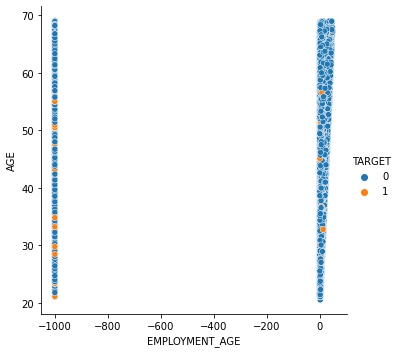

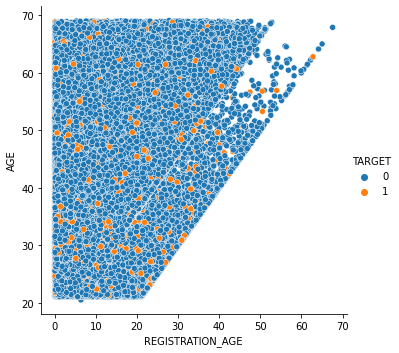

In [10]:
# Datatset columns Employment_Age and Registration_Age before cleaning
sns.relplot(data = app_data, y = 'AGE', x= 'EMPLOYMENT_AGE', color="g", hue = 'TARGET' )
sns.relplot(data = app_data, y = 'AGE', x= 'REGISTRATION_AGE', color="g", hue = 'TARGET' )

In [11]:
#Exploring the column Employment Age
min_threshold = app_data['EMPLOYMENT_AGE'].quantile(0.05)
print(min_threshold)

#Following same for Registration Age
max_threshold = app_data['EMPLOYMENT_AGE'].quantile(0.95)
print(max_threshold)
#Clearly we can see an outlier as Employment Age cannot be negative 1000

-1000.6657534246575
18.472602739726028


In [12]:
app_data = app_data[app_data['EMPLOYMENT_AGE']>min_threshold]
app_data = app_data[app_data['REGISTRATION_AGE']<max_threshold]

In [13]:
#Still we have got -0 as value 
app_data = app_data.loc[app_data['EMPLOYMENT_AGE'] != -0.00]
app_data = app_data.loc[app_data['REGISTRATION_AGE'] != -0.00]
app_data['EMPLOYMENT_AGE'].describe()

count    185195.000000
mean          5.956981
std           5.675317
min           0.002740
25%           2.002740
50%           4.243836
75%           8.065753
max          49.073973
Name: EMPLOYMENT_AGE, dtype: float64

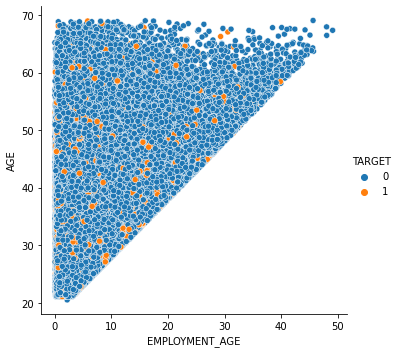

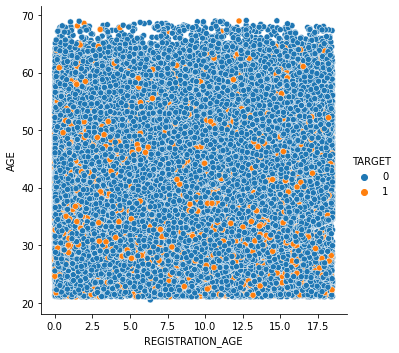

In [14]:
# Datatset columns Employment_Age and Registration_Age after cleaning
sns.relplot(data = app_data, y = 'AGE', x= 'EMPLOYMENT_AGE', color="g", hue = 'TARGET' )
sns.relplot(data = app_data, y = 'AGE', x= 'REGISTRATION_AGE', color="g", hue = 'TARGET' )

In [15]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_AGE,REGISTRATION_AGE
count,185195.000000,185195.000000,185195.000000,1.851950e+05,1.851950e+05,185188.000000,1.850100e+05,185195.000000,185195.000000,185195.000000,...,185195.000000,160185.000000,160185.000000,160185.000000,160185.000000,160185.000000,160185.000000,185195.000000,185195.000000,185195.000000
mean,278153.935387,0.092152,0.561916,1.767487e+05,6.049061e+05,27829.100384,5.440614e+05,0.020459,-2794.577246,0.999995,...,0.000416,0.006505,0.007042,0.034061,0.272847,0.259138,1.838880,38.774938,5.956981,8.360751
std,102816.899690,0.289240,0.798144,1.157968e+05,4.057138e+05,14714.103321,3.730232e+05,0.013420,1508.536217,0.002324,...,0.020386,0.084775,0.112131,0.203263,0.909062,0.887687,1.817943,9.563892,5.675317,5.343097
min,100002.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-7197.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.002740,0.002740
25%,189212.500000,0.000000,0.000000,1.125000e+05,2.725200e+05,17019.000000,2.430000e+05,0.009657,-4156.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.126027,2.002740,3.408219
50%,277995.000000,0.000000,0.000000,1.575000e+05,5.179275e+05,25879.500000,4.500000e+05,0.018850,-2875.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.676712,4.243836,8.202740
75%,367285.000000,0.000000,1.000000,2.160000e+05,8.140410e+05,35617.500000,6.885000e+05,0.028663,-1498.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,45.572603,8.065753,12.852055
max,456255.000000,1.000000,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,1.000000,...,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000,69.041096,49.073973,18.471233


### Removing some unwanted columns otherwise dimension for the dataset will be increased.

<AxesSubplot:>

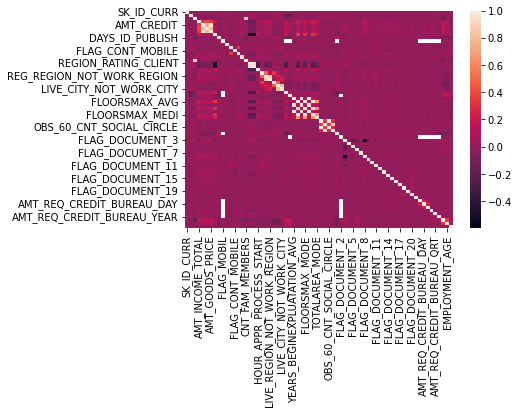

In [16]:
corr = app_data.corr()
sns.heatmap(corr)

In [17]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185195 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    185195 non-null  int64  
 1   TARGET                        185195 non-null  int64  
 2   NAME_CONTRACT_TYPE            185195 non-null  object 
 3   CODE_GENDER                   185195 non-null  object 
 4   FLAG_OWN_CAR                  185195 non-null  object 
 5   FLAG_OWN_REALTY               185195 non-null  object 
 6   CNT_CHILDREN                  185195 non-null  int64  
 7   AMT_INCOME_TOTAL              185195 non-null  float64
 8   AMT_CREDIT                    185195 non-null  float64
 9   AMT_ANNUITY                   185188 non-null  float64
 10  AMT_GOODS_PRICE               185010 non-null  float64
 11  NAME_TYPE_SUITE               184344 non-null  object 
 12  NAME_INCOME_TYPE              185195 non-nul

## Working with Previous_Loans and Bureau Datasets

In [18]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
prev_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
prev_loan_counts.sample(10)

,SK_ID_CURR,previous_loan_counts
63364,203060,8
111775,281976,3
152351,348332,3
133127,316928,6
42678,169292,1
173808,383538,1
140427,328930,11
63475,203233,9
141889,331399,7
190533,410912,6


In [19]:
#Previous Application Datatset
print(prev_app.shape)
print(missing_data(prev_app))

(1048575, 37)
                               Total    Percent
RATE_INTEREST_PRIVILEGED     1044854  99.645137
RATE_INTEREST_PRIMARY        1044854  99.645137
RATE_DOWN_PAYMENT             559396  53.348211
AMT_DOWN_PAYMENT              559396  53.348211
NAME_TYPE_SUITE               515140  49.127626
NFLAG_INSURED_ON_APPROVAL     420708  40.121880
DAYS_FIRST_DRAWING            420708  40.121880
DAYS_FIRST_DUE                420708  40.121880
DAYS_LAST_DUE_1ST_VERSION     420708  40.121880
DAYS_LAST_DUE                 420708  40.121880
DAYS_TERMINATION              420708  40.121880
AMT_GOODS_PRICE               240965  22.980235
AMT_ANNUITY                   233009  22.221491
CNT_PAYMENT                   233006  22.221205
PRODUCT_COMBINATION              224   0.021362
CHANNEL_TYPE                       0   0.000000
NAME_PRODUCT_TYPE                  0   0.000000
NAME_YIELD_GROUP                   0   0.000000
SELLERPLACE_AREA                   0   0.000000
NAME_SELLER_INDUSTRY      

In [20]:
prev_app_counts = prev_app.groupby('SK_ID_CURR', as_index=False)['NAME_CONTRACT_STATUS'].count().rename(columns = {'NAME_CONTRACT_STATUS': 'NO_OF_PREV_APP'})
prev_app_counts.sample(10)

,SK_ID_CURR,NO_OF_PREV_APP
281904,428403,4
10506,112213,4
200317,333474,4
108304,226184,3
220367,356828,4
130796,252477,2
33312,138719,3
3754,104334,1
172151,300653,4
242628,382391,3


In [21]:
# Merge with the training data
train = app_data.merge(prev_loan_counts, on = 'SK_ID_CURR', how = 'left')
train = train.merge(prev_app_counts, on = 'SK_ID_CURR', how = 'left')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185195 entries, 0 to 185194
Data columns (total 84 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    185195 non-null  int64  
 1   TARGET                        185195 non-null  int64  
 2   NAME_CONTRACT_TYPE            185195 non-null  object 
 3   CODE_GENDER                   185195 non-null  object 
 4   FLAG_OWN_CAR                  185195 non-null  object 
 5   FLAG_OWN_REALTY               185195 non-null  object 
 6   CNT_CHILDREN                  185195 non-null  int64  
 7   AMT_INCOME_TOTAL              185195 non-null  float64
 8   AMT_CREDIT                    185195 non-null  float64
 9   AMT_ANNUITY                   185188 non-null  float64
 10  AMT_GOODS_PRICE               185010 non-null  float64
 11  NAME_TYPE_SUITE               184344 non-null  object 
 12  NAME_INCOME_TYPE              185195 non-nul

In [22]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,FLAG_MOBIL,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_AGE,REGISTRATION_AGE,previous_loan_counts,NO_OF_PREV_APP
count,185195.000000,185195.000000,185195.000000,1.851950e+05,1.851950e+05,185188.000000,1.850100e+05,185195.000000,185195.000000,185195.000000,...,160185.000000,160185.000000,160185.000000,160185.000000,160185.000000,185195.000000,185195.000000,185195.000000,113750.000000,157710.000000
mean,278153.935387,0.092152,0.561916,1.767487e+05,6.049061e+05,27829.100384,5.440614e+05,0.020459,-2794.577246,0.999995,...,0.007042,0.034061,0.272847,0.259138,1.838880,38.774938,5.956981,8.360751,4.735191,3.327259
std,102816.899690,0.289240,0.798144,1.157968e+05,4.057138e+05,14714.103321,3.730232e+05,0.013420,1508.536217,0.002324,...,0.112131,0.203263,0.909062,0.887687,1.817943,9.563892,5.675317,5.343097,4.036806,2.702487
min,100002.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-7197.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.002740,0.002740,1.000000,1.000000
25%,189212.500000,0.000000,0.000000,1.125000e+05,2.725200e+05,17019.000000,2.430000e+05,0.009657,-4156.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,31.126027,2.002740,3.408219,2.000000,1.000000
50%,277995.000000,0.000000,0.000000,1.575000e+05,5.179275e+05,25879.500000,4.500000e+05,0.018850,-2875.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,37.676712,4.243836,8.202740,4.000000,3.000000
75%,367285.000000,0.000000,1.000000,2.160000e+05,8.140410e+05,35617.500000,6.885000e+05,0.028663,-1498.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,45.572603,8.065753,12.852055,7.000000,4.000000
max,456255.000000,1.000000,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,1.000000,...,9.000000,8.000000,27.000000,261.000000,23.000000,69.041096,49.073973,18.471233,116.000000,52.000000


<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Density'>

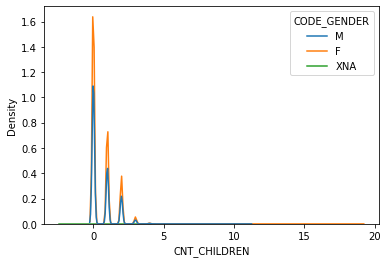

In [23]:
#Count children distribution before
sns.kdeplot(data = train, x= 'CNT_CHILDREN',hue = 'CODE_GENDER')

In [24]:
print(train['CNT_CHILDREN'].value_counts())
train = train.loc[train['CNT_CHILDREN'] < 7]
train['CNT_CHILDREN'].describe()


0     111697
1      47261
2      22577
3       3195
4        367
5         67
6         13
7          6
8          2
9          2
12         2
10         2
19         2
11         1
14         1
Name: CNT_CHILDREN, dtype: int64


count    185177.000000
mean          0.560982
std           0.791691
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: CNT_CHILDREN, dtype: float64

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Density'>

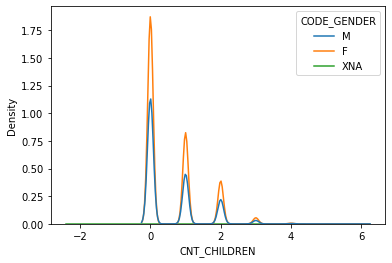

In [25]:
#Count children distribution after
sns.kdeplot(data = train, x= 'CNT_CHILDREN',hue = 'CODE_GENDER')

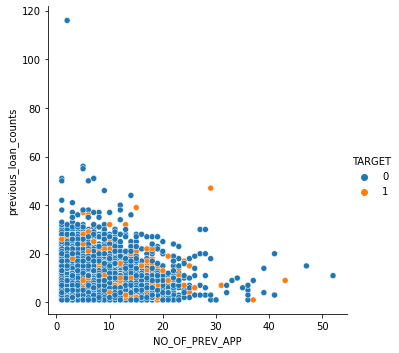

In [26]:
#Previous loan counts vs No. of Prev Applications before cleaning
sns.relplot(data = train, y = 'previous_loan_counts', x= 'NO_OF_PREV_APP', color="g", hue = 'TARGET' )

In [27]:
train['previous_loan_counts'].value_counts()

1.0      24386
2.0      17547
3.0      14185
4.0      11807
5.0       9536
6.0       7811
7.0       6250
8.0       5076
9.0       3989
10.0      3015
11.0      2447
12.0      1815
13.0      1395
14.0      1052
15.0       791
16.0       639
17.0       464
18.0       386
19.0       285
20.0       208
21.0       142
22.0       126
23.0        93
24.0        57
25.0        45
26.0        38
27.0        34
28.0        28
30.0        16
29.0        14
31.0        13
32.0        10
35.0         5
37.0         5
38.0         5
51.0         3
36.0         3
41.0         2
50.0         2
33.0         2
42.0         2
56.0         1
55.0         1
44.0         1
116.0        1
40.0         1
34.0         1
39.0         1
46.0         1
47.0         1
Name: previous_loan_counts, dtype: int64

In [28]:
#Removing the outlier from Previous Loan Counts

train = train.loc[train['previous_loan_counts'] != 116]
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,FLAG_MOBIL,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYMENT_AGE,REGISTRATION_AGE,previous_loan_counts,NO_OF_PREV_APP
count,185176.000000,185176.000000,185176.000000,1.851760e+05,1.851760e+05,185169.000000,1.849910e+05,185176.000000,185176.000000,185176.000000,...,160168.000000,160168.000000,160168.000000,160168.000000,160168.000000,185176.000000,185176.000000,185176.000000,113737.000000,157695.000000
mean,278155.408152,0.092145,0.560980,1.767517e+05,6.049220e+05,27829.588387,5.440766e+05,0.020459,-2794.557383,0.999995,...,0.007043,0.034052,0.272839,0.259147,1.838850,38.775071,5.957082,8.360660,4.734317,3.327296
std,102815.431635,0.289231,0.791692,1.157994e+05,4.057182e+05,14714.169083,3.730282e+05,0.013420,1508.546689,0.002324,...,0.112137,0.203245,0.909089,0.887725,1.817852,9.564151,5.675427,5.343160,4.023406,2.702567
min,100002.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-7197.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.002740,0.002740,1.000000,1.000000
25%,189215.750000,0.000000,0.000000,1.125000e+05,2.725200e+05,17019.000000,2.430000e+05,0.009657,-4156.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,31.126027,2.002740,3.408219,2.000000,1.000000
50%,277992.500000,0.000000,0.000000,1.575000e+05,5.179275e+05,25879.500000,4.500000e+05,0.018850,-2874.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,37.676712,4.243836,8.202740,4.000000,3.000000
75%,367284.500000,0.000000,1.000000,2.160000e+05,8.140410e+05,35617.500000,6.885000e+05,0.028663,-1498.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,45.575342,8.065753,12.852055,7.000000,4.000000
max,456255.000000,1.000000,6.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,1.000000,...,9.000000,8.000000,27.000000,261.000000,23.000000,69.041096,49.073973,18.471233,56.000000,52.000000


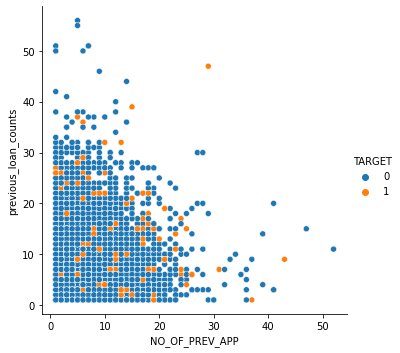

In [29]:
#Previous loan counts vs No. of Prev Applications after cleaning
sns.relplot(data = train, y = 'previous_loan_counts', x= 'NO_OF_PREV_APP', color="g", hue = 'TARGET' )

### Handling missing values

In [30]:
train.shape
print(train.isnull().sum())

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         7
AMT_GOODS_PRICE                   185
NAME_TYPE_SUITE                   851
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_TYPE                 29942
CNT_FAM_MEMBERS                     2
REGION_RATIN

In [31]:
#Filling missing values
train['previous_loan_counts'].fillna(value = 0, inplace= True)
train['NO_OF_PREV_APP'].fillna(value = 0, inplace= True)

#Filling all the missing values with 3 as null values are the thirds category
train['OCCUPATION_TYPE'] = train['OCCUPATION_TYPE'].fillna(value = 3)
print(train.isnull().sum())

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         7
AMT_GOODS_PRICE                   185
NAME_TYPE_SUITE                   851
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_TYPE                     0
CNT_FAM_MEMBERS                     2
REGION_RATIN

In [32]:
print(train.head(10))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100007       0         Cash loans           M            N   
4      100008       0         Cash loans           M            N   
5      100009       0         Cash loans           F            Y   
6      100010       0         Cash loans           M            Y   
7      100014       0         Cash loans           F            N   
8      100016       0         Cash loans           F            N   
9      100017       0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

### Dropping Irrelevant columns

In [33]:
list = train.columns.tolist()

In [34]:
labels =  ['REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

reduced_train = train.drop(columns = labels)

In [35]:
reduced_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185176 entries, 0 to 185194
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_CURR            185176 non-null  int64  
 1   TARGET                185176 non-null  int64  
 2   NAME_CONTRACT_TYPE    185176 non-null  object 
 3   CODE_GENDER           185176 non-null  object 
 4   FLAG_OWN_CAR          185176 non-null  object 
 5   FLAG_OWN_REALTY       185176 non-null  object 
 6   CNT_CHILDREN          185176 non-null  int64  
 7   AMT_INCOME_TOTAL      185176 non-null  float64
 8   AMT_CREDIT            185176 non-null  float64
 9   AMT_ANNUITY           185169 non-null  float64
 10  AMT_GOODS_PRICE       184991 non-null  float64
 11  NAME_TYPE_SUITE       184325 non-null  object 
 12  NAME_INCOME_TYPE      185176 non-null  object 
 13  NAME_EDUCATION_TYPE   185176 non-null  object 
 14  NAME_FAMILY_STATUS    185176 non-null  object 
 15  

### Mapping labels to label encode

In [36]:
mapping_labels = {'NAME_CONTRACT_TYPE':{'Cash loans': 0, 'Revolving loans': 1}, 
                 'CODE_GENDER':{'M': 0, 'F':1, 'XNA' :1}, 
                 'FLAG_OWN_CAR':{'Y':1, 'N': 0}, 
                 'FLAG_OWN_REALTY':{'Y':1, 'N':0},
                 'NAME_TYPE_SUITE':{'Unaccompanied':0, 'Family':1, 'Spouse, partner':1,'Children':1,'Other_B':1,'Other_A':1, 'Group of people':1},    
                 'NAME_INCOME_TYPE':{'Student':0, 'Unemployed':1,'Pensioner':2,'Maternity leave':2, 'Working':3, 'Commercial associate': 3, 'State servant':4, 'Businessman':4},    
                 'NAME_EDUCATION_TYPE':{'Incomplete higher':0, 'Lower secondary':0, 'Secondary / secondary special':1, 'Higher education':2, 'Academic degree':3},    
                 'NAME_FAMILY_STATUS':{'Single':0, 'Unknown':0, 'Separated':1, 'Widow':1, 'Married':2, 'Civil marriage':2, 'Single / not married':0},    
                 'NAME_HOUSING_TYPE':{'With parents':0, 'Municipal apartment':1, 'Office apartment':1, 'Co-op apartment':1, 'Rented apartment':2, 'House / apartment':3},    
                 'OCCUPATION_TYPE':{'Laborers':0, 'Security staff':0, 'Drivers':0, 'Low-skill Laborers':0, 'Cooking staff':0, 'Cleaning staff':0, 'Waiters/barmen staff':1, 'Sales staff':1, 'Core staff':1, 'Managers':2, 'Accountants':1, 'Medicine staff':1, 'Private service staff':1, 'HR staff':1, 'IT staff':1, 'High skill tech staff':2, 'Secretaries':2, 'Realty agents':2},    
                 'ORGANIZATION_TYPE':{'Business Entity Type 3': 0, 'XNA': 0, 'Self-employed': 0, 'Other': 0, 'Medicine': 1, 'Business Entity Type 2': 0, 'Government': 1, 'School': 1, 'Trade: type 7': 0, 'Kindergarten': 1, 'Construction': 0, 'Business Entity Type 1': 0, 'Transport: type 4': 0, 'Trade: type 3': 0, 'Industry: type 9': 0, 'Industry: type 3': 0, 'Security': 0, 'Housing': 0, 'Industry: type 11': 0, 'Military': 1, 'Bank': 1, 'Agriculture': 0, 'Police': 1, 'Transport: type 2': 0, 'Postal': 0, 'Security Ministries': 1, 'Trade: type 2': 0, 'Restaurant': 0, 'Services': 1, 'University': 1, 'Industry: type 7': 0, 'Transport: type 3': 0, 'Industry: type 1': 0, 'Hotel': 0, 'Electricity': 0, 'Industry: type 4': 0, 'Trade: type 6': 0, 'Industry: type 5': 0, 'Insurance': 0, 'Telecom': 0, 'Emergency': 1, 'Industry: type 2': 0, 'Advertising': 0, 'Realtor': 0, 'Culture': 0, 'Industry: type 12': 0, 'Trade: type 1': 0, 'Mobile': 0, 'Legal Services': 1, 'Cleaning': 0, 'Transport: type 1': 0, 'Industry: type 6': 0, 'Industry: type 10': 0, 'Religion': 0, 'Industry: type 13': 0, 'Trade: type 4': 0, 'Trade: type 5': 0, 'Industry: type 8': 0} }
train_mapped = reduced_train.replace(mapping_labels)

In [37]:
train_mapped.fillna(method = 'ffill',inplace = True)

In [38]:
train_mapped.isnull().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
CNT_CHILDREN            0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_ANNUITY             0
AMT_GOODS_PRICE         0
NAME_TYPE_SUITE         0
NAME_INCOME_TYPE        0
NAME_EDUCATION_TYPE     0
NAME_FAMILY_STATUS      0
NAME_HOUSING_TYPE       0
FLAG_MOBIL              0
FLAG_EMP_PHONE          0
FLAG_WORK_PHONE         0
FLAG_CONT_MOBILE        0
FLAG_PHONE              0
FLAG_EMAIL              0
OCCUPATION_TYPE         0
CNT_FAM_MEMBERS         0
ORGANIZATION_TYPE       0
AGE                     0
EMPLOYMENT_AGE          0
REGISTRATION_AGE        0
previous_loan_counts    0
NO_OF_PREV_APP          0
dtype: int64

### One-hot encoding using Pandas get_dummies method

In [39]:
columns = ['CNT_CHILDREN', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE','NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']

In [40]:
train_labelled = pd.get_dummies(train_mapped, columns=columns)

In [41]:
train_labelled.sample(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
155864,399847,0,0,1,1,0,225000.0,269550.0,13761.0,225000.0,...,0,1,0,0,0,1,0,0,0,1
156573,401229,0,0,0,1,1,270000.0,900000.0,33354.0,900000.0,...,0,1,0,0,0,1,0,0,0,1
166284,420011,0,0,1,0,0,126000.0,755190.0,28894.5,675000.0,...,0,1,0,1,0,0,0,0,0,1
152284,392821,0,0,1,1,1,157500.0,454500.0,19386.0,454500.0,...,0,1,0,0,0,1,0,1,0,0
128770,347765,0,0,0,0,1,189000.0,675000.0,49117.5,675000.0,...,0,1,0,0,0,1,0,0,0,1
55983,207958,0,0,1,1,0,117000.0,796396.5,38443.5,643500.0,...,0,0,1,0,0,1,0,0,0,1
8135,115647,0,0,1,0,1,202500.0,495000.0,36355.5,495000.0,...,0,1,0,0,1,0,0,0,0,1
105089,301937,0,0,1,0,1,270000.0,599778.0,28854.0,477000.0,...,0,0,1,0,0,1,0,0,0,1
118119,327256,0,0,1,1,1,180000.0,612000.0,48483.0,612000.0,...,0,1,0,0,0,1,0,0,0,1
31783,161176,0,1,1,0,1,90000.0,270000.0,13500.0,270000.0,...,0,0,1,0,0,1,0,0,0,1


In [42]:
train_labelled['TARGET'].value_counts()

0    168113
1     17063
Name: TARGET, dtype: int64

### Exporting final dataset to csv

In [43]:
train_mapped.to_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_cleaned.csv')
train_labelled.to_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_cleaned_labelled.csv')